# Small Business Loans

Our overall objectives are to determine what factors tend to cause a loan to be defaulted on and to create a model to predict which approved loan applications will default on their loan. Our target audience consists of consultants who help small businesses grow. In particular, we want to help guide them from an initial idea to the point where they can qualify for a small business loan and be successful enough to not default on it.

# Imports

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shared drives/Project 2 (MATH 3439)/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Data

In [4]:
df = pd.read_csv(drive_dir + 'SBAnational.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


# Describing the Data and Initial Cleaning

In [6]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [7]:
df.shape

(899164, 27)

Show the 10 most occuring borrower cities.

In [8]:
df['City'].value_counts()[:10]

LOS ANGELES    11558
HOUSTON        10247
NEW YORK        7846
CHICAGO         6036
MIAMI           5594
SAN DIEGO       5363
DALLAS          5085
PHOENIX         4493
LAS VEGAS       4390
SPRINGFIELD     3738
Name: City, dtype: int64

There are 51 borrower states (50 states + Washington, D.C.) total.

In [9]:
df['State'].nunique()

51

In [10]:
df['State'].value_counts()

CA    130619
TX     70458
NY     57693
FL     41212
PA     35170
OH     32622
IL     29669
MA     25272
MN     24373
NJ     24035
WA     23263
GA     22277
WI     21040
MO     20678
CO     20605
MI     20545
UT     18776
AZ     17631
NC     14294
IN     14132
MD     13269
VA     13264
CT     12229
NH     12109
IA     11996
KS     11464
OR     11051
OK      9950
LA      9576
ID      9498
TN      9403
RI      9028
MT      8749
AL      8362
NV      8024
KY      7723
MS      7686
NE      6386
AR      6341
NM      6033
ME      5944
SC      5597
VT      5454
ND      5245
SD      4431
HI      3610
WV      3287
WY      2839
AK      2405
DE      2220
DC      1613
Name: State, dtype: int64

Find the 10 most occurring borrower zipcodes.

In [11]:
df['Zip'].value_counts()[:10]

10001    933
90015    926
93401    806
90010    733
33166    671
90021    666
59601    640
65804    599
3801     581
59101    578
Name: Zip, dtype: int64

Find the 10 banks that gave out the highest number of small business loans.

In [12]:
df['Bank'].value_counts()[:10]

BANK OF AMERICA NATL ASSOC        86853
WELLS FARGO BANK NATL ASSOC       63503
JPMORGAN CHASE BANK NATL ASSOC    48167
U.S. BANK NATIONAL ASSOCIATION    35143
CITIZENS BANK NATL ASSOC          35054
PNC BANK, NATIONAL ASSOCIATION    27351
BBCN BANK                         22978
CAPITAL ONE NATL ASSOC            22248
MANUFACTURERS & TRADERS TR CO     11265
READYCAP LENDING, LLC             10664
Name: Bank, dtype: int64

There are 56 bank states.

In [13]:
df['BankState'].nunique()

56

The 6 additional states include Washington, D.C. (DC), Puerto Rico (PR), Guam (GU), **?** (EN), U.S. Virgin Islands (VI), and **?** (AN).

In [14]:
df['BankState'].value_counts()

CA    118116
NC     79514
IL     65908
OH     58461
SD     51095
TX     47790
RI     45366
NY     39592
VA     29002
DE     24537
MN     19960
UT     18997
PA     17081
WI     15416
MO     14861
MA     13913
GA     13812
FL     13810
AL     12134
OR     11374
WA     10693
CO     10582
CT      9917
IA      9866
NJ      9436
KS      8876
MT      7860
IN      7623
SC      7472
MI      7369
OK      7326
MD      7016
NH      6807
AR      6322
MS      5942
TN      5620
NE      5337
ND      5113
LA      5062
VT      4757
NM      4422
KY      4382
NV      4325
ID      4314
DC      4003
AZ      3957
ME      3691
HI      2991
WY      2168
WV      2007
AK      1439
PR       156
GU         5
VI         1
EN         1
AN         1
Name: BankState, dtype: int64

Removing `AN` and `EN` becuase they are not states.

In [15]:
indextodrop = df[(df['BankState'] == 'AN') | (df['BankState'] == 'EN')].index

In [16]:
df.drop(indextodrop, inplace=True)

In [17]:
df['BankState'].nunique()

54

`NAICS` is the North American industry classification system code. The sector can be determined by the first two digits of this code. (For example, codes that start with 23 belong to the construction sector.) We can potentially create a new column later with sectors based on this code. There are 1312 unique NAICS codes. 0 is the most entered code, with 722110 (accommodation and food services) being second.

In [18]:
df['NAICS'].nunique()

1312

In [19]:
df['NAICS'].value_counts()[:10]

0         201947
722110     27989
722211     19448
811111     14585
621210     14048
624410     10111
812112      9230
561730      8935
621310      8733
812320      7894
Name: NAICS, dtype: int64

Next we want to look at the approval date, so to get statistics we have to convert this to a datetime to make things easier.

In [20]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [21]:
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])

The first approval date in this dataset occurred in February of 1970 with the last one occurring in 2069.

In [22]:
df['ApprovalDate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  899162
unique                   9859
top       1993-07-07 00:00:00
freq                     1131
first     1970-02-11 00:00:00
last      2069-10-13 00:00:00
Name: ApprovalDate, dtype: object

We removed all `ApprovalDate`s after 2020

In [23]:
sum(df['ApprovalDate'].dt.year > 2020)

13

In [24]:
df = df[(df['ApprovalDate'].dt.year <= 2020)]

In [25]:
df['ApprovalDate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  899149
unique                   9846
top       1993-07-07 00:00:00
freq                     1131
first     1970-02-11 00:00:00
last      2014-06-25 00:00:00
Name: ApprovalDate, dtype: object

In [26]:
df['ApprovalFY'].describe()

count     899149
unique        62
top         2006
freq       76040
Name: ApprovalFY, dtype: int64

`Term` refers to the loan term in months. The mean is 110.8 months, the minimum is 0 months, the median is 84 months, and the maximum is 569 months.

In [27]:
df['Term'].describe()

count    899149.00000
mean        110.77230
std          78.85682
min           0.00000
25%          60.00000
50%          84.00000
75%         120.00000
max         569.00000
Name: Term, dtype: float64

`NoEmp` refers to the number of employees.

In [28]:
df['NoEmp'].describe()

count    899149.000000
mean         11.411169
std          74.108675
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: NoEmp, dtype: float64

`NewExist` refers to whether the business is an existing business (1) or a new business (2).

In [29]:
df['NewExist'].value_counts()

1.0    644866
2.0    253123
0.0      1024
Name: NewExist, dtype: int64

Removing values associated with `0.0`

In [30]:
df = df[df['NewExist'] != 0]

In [31]:
df['NewExist'].value_counts()

1.0    644866
2.0    253123
Name: NewExist, dtype: int64

`CreateJob` refers to the number of jobs created.

In [32]:
df['CreateJob'].describe()

count    898125.000000
mean          8.404199
std         236.256511
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8800.000000
Name: CreateJob, dtype: float64

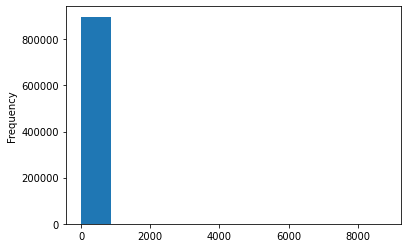

In [33]:
df['CreateJob'].plot( kind = 'hist')

`RetainedJob` refers to the number of jobs retained.

In [34]:
df['RetainedJob'].describe()

count    898125.000000
mean         10.777277
std         236.712846
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        9500.000000
Name: RetainedJob, dtype: float64

0 and 1 both mean not a franchise.

In [35]:
df['FranchiseCode'].value_counts()[:10]

1        637648
0        208775
78760      3364
68020      1918
50564      1032
21780      1001
25650       714
79140       659
22470       614
17998       606
Name: FranchiseCode, dtype: int64

`UrbanRural` refers to if the small business is located in an urban or rural location. `1` means urban, `2` means rural, while `0` means undefined.

In [36]:
df['UrbanRural'].value_counts()

1    470290
0    322649
2    105186
Name: UrbanRural, dtype: int64

`RevLineCr` means revolving line of credit. `Y` means yes and `N` means no.

In [37]:
df['RevLineCr'].value_counts()

N    419348
0    257546
Y    201364
T     15278
1        22
R        14
`        11
2         6
C         2
4         1
,         1
A         1
-         1
.         1
3         1
7         1
5         1
Q         1
Name: RevLineCr, dtype: int64

`LowDoc` refers to the LowDoc loan program. `Y` means yes and `N` means no.

In [38]:
df['LowDoc'].value_counts()

N    781913
Y    110210
0      1490
C       754
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

Next we want to analyze `ChgOffDate` so we want to convert this to a datetime. It is the date when a loan is declared to be in default.

In [39]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate                   object
DisbursementDate             object
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
dtype: object

In [40]:
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'])

In [41]:
df['ChgOffDate'].nunique()

6445

The first default occured in 1988 and the last one occurred in 2026.

In [42]:
df['ChgOffDate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  162622
unique                   6445
top       2010-03-13 00:00:00
freq                      734
first     1988-10-03 00:00:00
last      2026-10-22 00:00:00
Name: ChgOffDate, dtype: object

In [43]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

As we can see again, the last disbursement date occurs in 2048.

In [44]:
df['DisbursementDate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  895764
unique                   8456
top       1995-07-31 00:00:00
freq                    10352
first     1970-02-26 00:00:00
last      2048-09-17 00:00:00
Name: DisbursementDate, dtype: object

In [45]:
sum(df['DisbursementDate'].dt.year > 2020)

2

Removed values > 2020

In [46]:
df = df[(df['DisbursementDate'].dt.year <= 2020)]

In [47]:
df['DisbursementDate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  895762
unique                   8454
top       1995-07-31 00:00:00
freq                    10352
first     1970-02-26 00:00:00
last      2020-04-14 00:00:00
Name: DisbursementDate, dtype: object

`MIS_Status` refers to the loan status. `P I F` means paid in full while `CHGOFF` means charged off.

In [48]:
df['MIS_Status'].value_counts()

P I F     736792
CHGOFF    157166
Name: MIS_Status, dtype: int64

As for the columns `DisbursementGross`, `ChgOffPrinGr`, `GrAppv`, and `SBA_Approv`, we will have to strip the dollar sign from it and convert these to floats to describe this data. This will be done in the next section.

# Cleaning the Data, Cont'd

In [49]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Changing dollar amounts from objects to floats by deleting dollar signs and commas


In [50]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace(r'$', '').str.replace(r',', '').astype(float)
df['BalanceGross'] = df['BalanceGross'].str.replace(r'$', '').str.replace(r',', '').astype(float)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace(r'$', '').str.replace(r',', '').astype(float)
df['GrAppv'] = df['GrAppv'].str.replace(r'$', '').str.replace(r',', '').astype(float)
df['SBA_Appv'] = df['SBA_Appv'].str.replace(r'$', '').str.replace(',', '').astype(float)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


Changing columns to lower case and replacing spaces with under scores

In [51]:
def clean_col(col):
    col = col.strip()
    col = col.replace(" ", "_") 
    col = col.lower()
    return col
df.columns = [clean_col(c) for c in df.columns]

In [52]:
df.dtypes

loannr_chkdgt                 int64
name                         object
city                         object
state                        object
zip                           int64
bank                         object
bankstate                    object
naics                         int64
approvaldate         datetime64[ns]
approvalfy                   object
term                          int64
noemp                         int64
newexist                    float64
createjob                     int64
retainedjob                   int64
franchisecode                 int64
urbanrural                    int64
revlinecr                    object
lowdoc                       object
chgoffdate           datetime64[ns]
disbursementdate     datetime64[ns]
disbursementgross           float64
balancegross                float64
mis_status                   object
chgoffpringr                float64
grappv                      float64
sba_appv                    float64
dtype: object

Creating a new column `default` that tells us whether a business defaulted (1) or not (0).

In [53]:
def change_default(col, new_name, df):
  df[new_name] = df[col]
  df = df.drop(col, axis='columns')
  df[new_name] = df[new_name].replace(['P I F', 'CHGOFF'], [0,1])
  df = df.dropna(subset=[new_name], how='any')
  df[new_name] = df[new_name].astype('int')

  return df

In [54]:
df = change_default(col='mis_status', new_name='default', df=df)

In [55]:
df.head()

,loannr_chkdgt,name,city,state,zip,bank,bankstate,naics,approvaldate,approvalfy,term,noemp,newexist,createjob,retainedjob,franchisecode,urbanrural,revlinecr,lowdoc,chgoffdate,disbursementdate,disbursementgross,balancegross,chgoffpringr,grappv,sba_appv,default
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,0.0,60000.0,48000.0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,0.0,40000.0,32000.0,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,0.0,287000.0,215250.0,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,0.0,229000.0,229000.0,0


Creating a new column for sector name based on first two digits of NAICS code

In [56]:
df['industry'] = df['naics'].astype('str').apply(lambda x: x[:2])

In [57]:
df['industry'].unique()

array(['45', '72', '62', '0', '33', '81', '23', '44', '42', '61', '53',
       '54', '31', '51', '71', '52', '21', '32', '56', '48', '11', '92',
       '22', '49', '55'], dtype=object)

In [58]:
naics_dict = {'11': 'agriculture, forestry, fishing, hunting', 
              '21': 'mining, quarrying, oil/gas extraction', 
              '22': 'utilities', 
              '23': 'construction', 
              '31': 'manufacturing', 
              '32': 'manufacturing', 
              '33': 'manufacturing', 
              '42': 'wholesale trade',
              '44': 'retail trade', 
              '45': 'retail trade', 
              '48': 'transportation, warehousing', 
              '49': 'transportation, warehousing',
              '51': 'information',
              '52': 'finance, insurance',
              '53': 'real estate, rental, leasing',
              '54': 'professional, scientific, technical services',
              '55': 'management of companies/enterprises',
              '56': 'administrative, support, waste management, remediation services',
              '61': 'educational services',
              '62': 'health care, social assistance',
              '71': 'arts, entertainment, recreation',
              '72': 'accommodation, food services',
              '81': 'other (except public administration)',
              '92': 'public administration'}
df['industry'] = df['industry'].map(naics_dict)

In [59]:
df.head()

,loannr_chkdgt,name,city,state,zip,bank,bankstate,naics,approvaldate,approvalfy,term,noemp,newexist,createjob,retainedjob,franchisecode,urbanrural,revlinecr,lowdoc,chgoffdate,disbursementdate,disbursementgross,balancegross,chgoffpringr,grappv,sba_appv,default,industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,0.0,60000.0,48000.0,0,retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,0.0,40000.0,32000.0,0,"accommodation, food services"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,0.0,287000.0,215250.0,0,"health care, social assistance"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,0.0,35000.0,28000.0,0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,0.0,229000.0,229000.0,0,NaN


Now we deal with missing values.

In [60]:
for c in df.columns:
    num_missing = df[c].isna().sum()
    if num_missing > 0:
      print(f'{c}: {num_missing} ({100*num_missing / df.shape[0]:.2f}%) missing values')

name: 14 (0.00%) missing values
city: 30 (0.00%) missing values
state: 12 (0.00%) missing values
bank: 1502 (0.17%) missing values
bankstate: 1509 (0.17%) missing values
newexist: 134 (0.01%) missing values
revlinecr: 4515 (0.51%) missing values
lowdoc: 2546 (0.28%) missing values
chgoffdate: 731926 (81.87%) missing values
industry: 201066 (22.49%) missing values


In [61]:
df['industry'] = df['industry'].fillna('Unknown')
df['revlinecr'] = df['revlinecr'].fillna('Unknown')
df_default = df[df['default'] == 1]
df_nondefault = df[df['default'] == 0]
df = df.drop(['naics', 'balancegross','chgoffdate'], axis=1)
df = df.dropna(how = 'any')

In [62]:
df.isna().sum()

loannr_chkdgt        0
name                 0
city                 0
state                0
zip                  0
bank                 0
bankstate            0
approvaldate         0
approvalfy           0
term                 0
noemp                0
newexist             0
createjob            0
retainedjob          0
franchisecode        0
urbanrural           0
revlinecr            0
lowdoc               0
disbursementdate     0
disbursementgross    0
chgoffpringr         0
grappv               0
sba_appv             0
default              0
industry             0
dtype: int64

Dealing with weird values.

In [63]:
df['revlinecr'].value_counts()

N          414506
0          257307
Y          198235
T           15100
Unknown      4506
1              22
R              14
`              11
2               6
C               2
,               1
A               1
4               1
.               1
-               1
3               1
7               1
5               1
Q               1
Name: revlinecr, dtype: int64

In [64]:
df['revlinecr'] = df['revlinecr'].replace('0', 'N')
df['revlinecr'] = df['revlinecr'].replace('1', 'Y')

In [65]:
df = df[(df['revlinecr']== 'N') | (df['revlinecr']== 'Y')]

In [66]:
df['revlinecr'].value_counts()

N    671813
Y    198257
Name: revlinecr, dtype: int64

In [67]:
df['lowdoc'].value_counts()

N    759171
Y    107756
0      1235
C       751
S       595
A       488
R        73
1         1
Name: lowdoc, dtype: int64

In [68]:
df = df[(df['lowdoc']== 'N') | (df['lowdoc']== 'Y')]

In [69]:
df['lowdoc'].value_counts()

N    759171
Y    107756
Name: lowdoc, dtype: int64

In [70]:
df = df[df['approvalfy'] != '1976A']

In [71]:
sum(df['default'])

148853

In [72]:
df['default'].shape

(866912,)

In [73]:
num_missing_rows = df.shape[0] - df.dropna(axis='index').shape[0]
print(f'{num_missing_rows} rows with missing data ({100 * num_missing_rows / df.shape[0]:.2f}%)')

0 rows with missing data (0.00%)


In [74]:
df.to_csv(drive_dir + 'clean_data.csv', index = False)

# Analysis, Part 1

We want to analyze the columns city, state, bank, approvaldate, term, noemp, newexist, createjob, retainedjob, franchisecode, urbanrural, lowdoc, disbursementgross, and industry. In this section we will analyze city, state, noemp, createjob, retainedjob, franchisecode, urbanrural, lowdoc, and disbursementgross. We found that bank, approvaldate, term, newexist, and industry are the most important, most helpful, and most interesting factors for a consultant to inform small businesses about so we will save them for a separate section.

## city

We will analyze the four most popular cities.

In [78]:
df_c = df[(df['city']=='LOS ANGELES') | (df['city']=='HOUSTON') | (df['city']=='NEW YORK') | (df['city']=='CHICAGO')]

In [79]:
df_c['city'].value_counts()

LOS ANGELES    11061
HOUSTON         9995
NEW YORK        7534
CHICAGO         5838
Name: city, dtype: int64

In [107]:
def loc_analysis(column):
  df_default = df_c[df_c['default']==1]
  df_no_default = df_c[df_c['default']==0]
  c_def = df_default.groupby([column])  #Groupby the city for defaults
  total_def_c = c_def['default'].count()
  c_nondefault = df_no_default.groupby([column])   #Groupby the industry for non-defaults
  total_no_c = c_nondefault['default'].count()
  total = (total_def_c / (total_def_c+total_no_c)*100).sort_values(ascending=True)
  plt.figure(figsize=(12,8))
  plt.barh(total.index, total, alpha=0.5)
  plt.grid()
  plt.title(f'Default Percentage per {column}', fontsize =20)
  plt.xlabel('Percentage', fontsize=16)
  plt.yticks(fontsize=12)

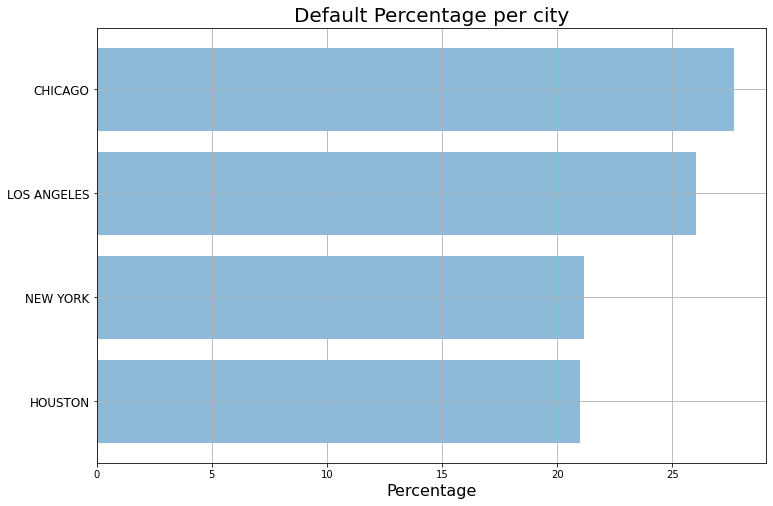

In [83]:
loc_analysis(column='city')

As we can see, the difference in percentages between these four popular states is not huge.

## state

We will analyze the four most popular states.

In [85]:
df['state'].value_counts()[:4]

CA    126433
TX     67923
NY     55657
FL     39166
Name: state, dtype: int64

In [86]:
df_c = df[(df['state']=='CA') | (df['state']=='TX') | (df['state']=='NY') | (df['state']=='FL')]

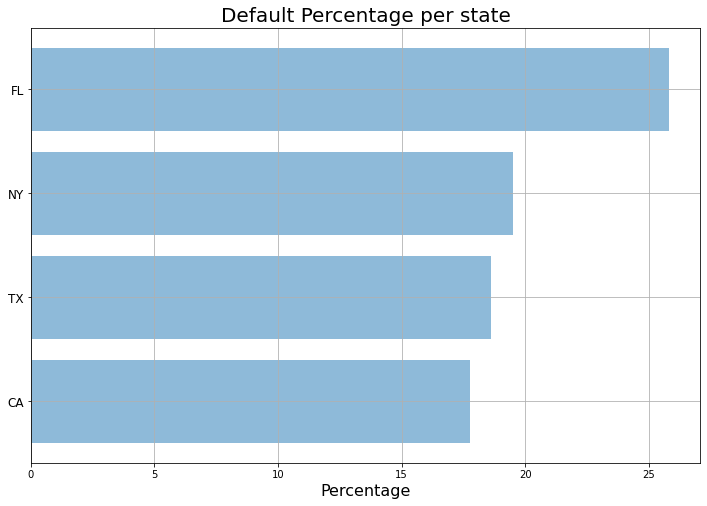

In [87]:
loc_analysis(column='state')

There is some difference between states, but other factors were more striking.

## noemp

In [94]:
df['noemp'].describe()

count    866912.000000
mean         11.479702
std          74.731405
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: noemp, dtype: float64

In [98]:
df['noemp'].value_counts()[:5]

1    147841
2    133069
3     87156
4     70919
5     58144
Name: noemp, dtype: int64

We will analyze the four most occurring number of employees

In [99]:
df_c = df[(df['noemp']==1) | (df['noemp']==2) | (df['noemp']==3) | (df['noemp']==4) | (df['noemp']==5)]

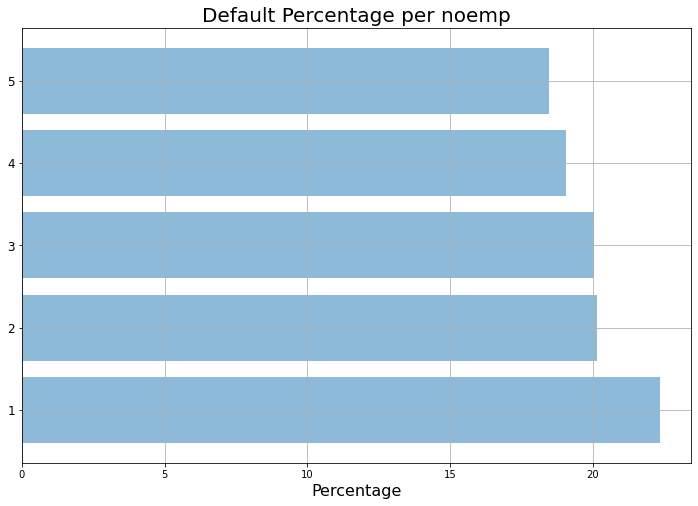

In [100]:
loc_analysis(column='noemp')

Again, we're not seeing a huge difference in percentage of defaults between numbers of employees.

## createjob

In [101]:
df['createjob'].describe()

count    866912.000000
mean          8.581261
std         239.345588
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8800.000000
Name: createjob, dtype: float64

In [104]:
df['createjob'].value_counts()[:5]

0    606790
1     60507
2     55356
3     27723
4     19776
Name: createjob, dtype: int64

We will analyze the four most occuring number of created jobs, since these make up the majority of our dataset.

In [105]:
df_c = df[(df['createjob']==0) | (df['createjob']==1) | (df['createjob']==2) | (df['createjob']==3) | (df['createjob']==4)]

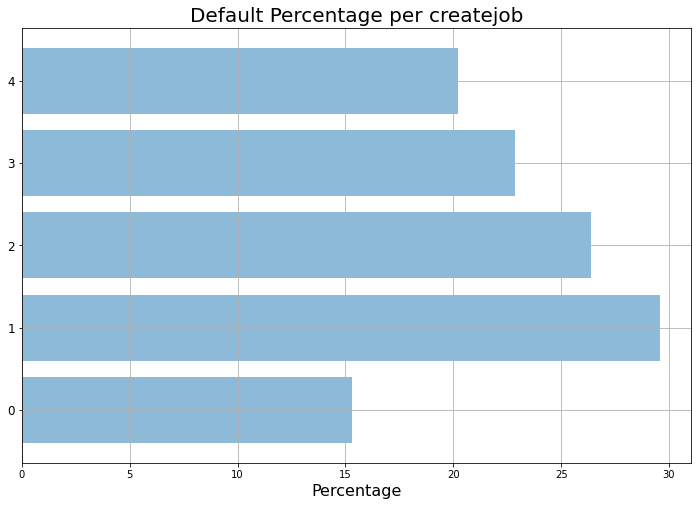

In [106]:
loc_analysis(column='createjob')

There are differences in percentages especially between 0 created jobs and 1 created job. It would be odd for a business consultant to advise a business to not create any jobs because the goal of businesses is to grow.

## retained job

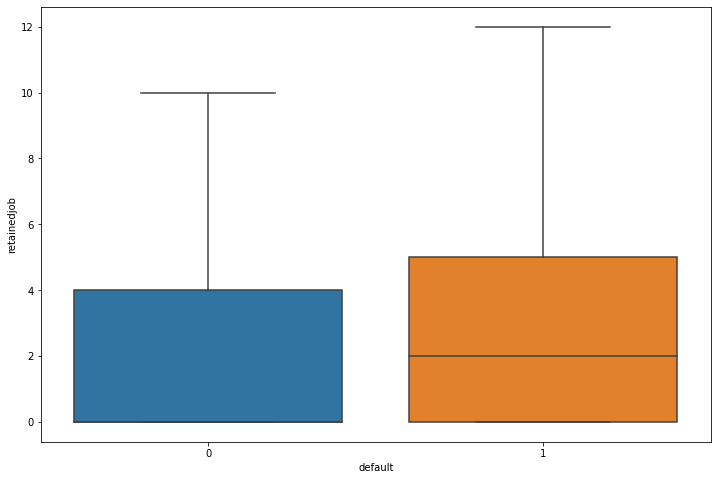

In [113]:
fig, ax = plt.subplots(figsize=(12, 8))
# plot "x" versus createjob with the boxplots being default or pif
fig = sns.boxplot(x='default', y='retainedjob', data=df, showfliers=False)

There is a difference in the amount of retained jobs between businesses that defaulted and did not default. However, there were more striking differences in other columns.

## franchise

Next let's look at franchise. Since we could not find what each franchise code meant, we will create a new column for whether or not the business is a franchise (0 = not a franchise, 1 = franchise)

In [118]:
df['franchise'] = df['franchisecode']

In [119]:
df['franchise'] = df['franchise'].replace(1, 0)

In [122]:
df['franchise'] = df['franchise'].where(df['franchise'] == 0, 1)

In [123]:
df['franchise'].value_counts()

0    816199
1     50713
Name: franchise, dtype: int64

In [124]:
franchise = df[df['franchise']==1]
nonfranchise = df[df['franchise']==0]

In [125]:
franchise_default = df.groupby('franchise')['default'].sum()

In [126]:
franchise_default

franchise
0    141148
1      7705
Name: default, dtype: int64

In [127]:
franchise_default = franchise_default.reset_index()

In [128]:
franchise_default['default percentages'] = franchise_default['default']

In [129]:
franchise_default['default percentages'][0] = 100 * franchise_default['default'][0] / nonfranchise.shape[0] 
franchise_default['default percentages'][1] = 100 * franchise_default['default'][1] / franchise.shape[0] 

In [130]:
franchise_default

,franchise,default,default percentages
0,0,141148,17
1,1,7705,15


After seeing whether a business was a franchise or not, we calculated how many of them defaulted, and calculated the corresponding percentages.

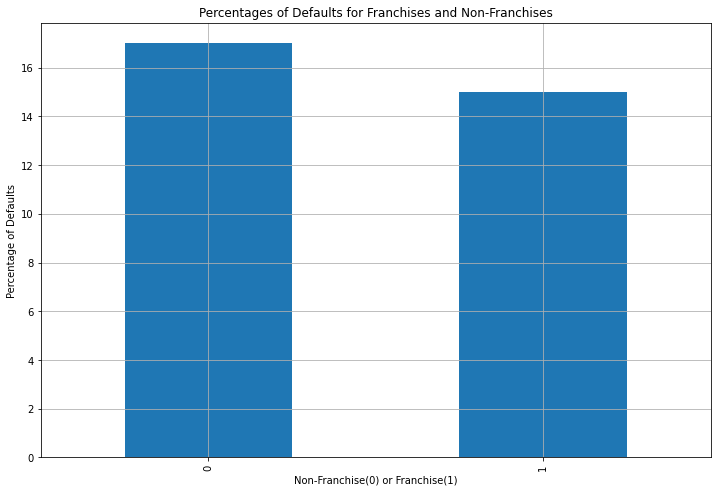

In [131]:
ax = franchise_default.plot(kind='bar', x='franchise', y='default percentages', figsize=(12, 8), title='Percentages of Defaults for Franchises and Non-Franchises', grid=True, legend=False)
ax.set_xlabel('Non-Franchise(0) or Franchise(1)')
ax.set_ylabel('Percentage of Defaults');

As we can see, there isn't that big of a difference.

## urbanrural

In [133]:
df_c = df[(df['urbanrural']==1) | (df['urbanrural']==2)]

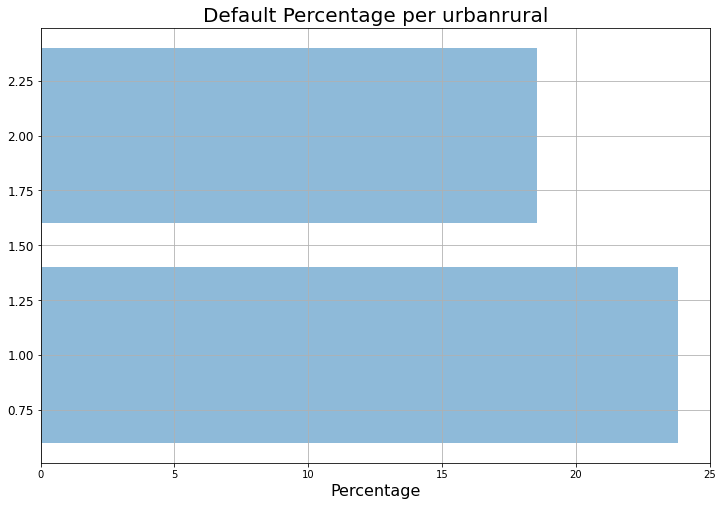

In [134]:
loc_analysis(column='urbanrural')

As a reminder, 1 is urban and 2 is rural. There is a difference here. We also concluded whether a business is in an urban or rural area also corresponds to industry so we focused on industry as well in the next section.

## lowdoc

In [135]:
df['lowdoc'].value_counts()

N    759156
Y    107756
Name: lowdoc, dtype: int64

In [136]:
df_c = df[(df['lowdoc']=='N') | (df['lowdoc']=='Y')]

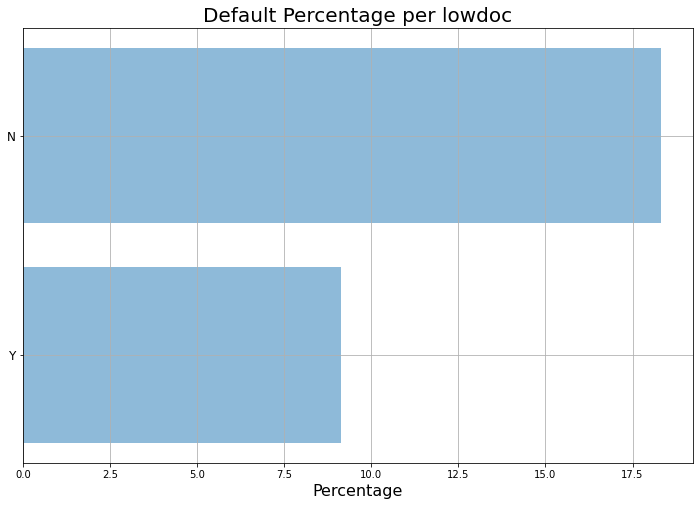

In [137]:
loc_analysis(column='lowdoc')

We can see a difference here so it would be wise for a business consultant to advise a business to be in the low doc program.

## disbursementgross

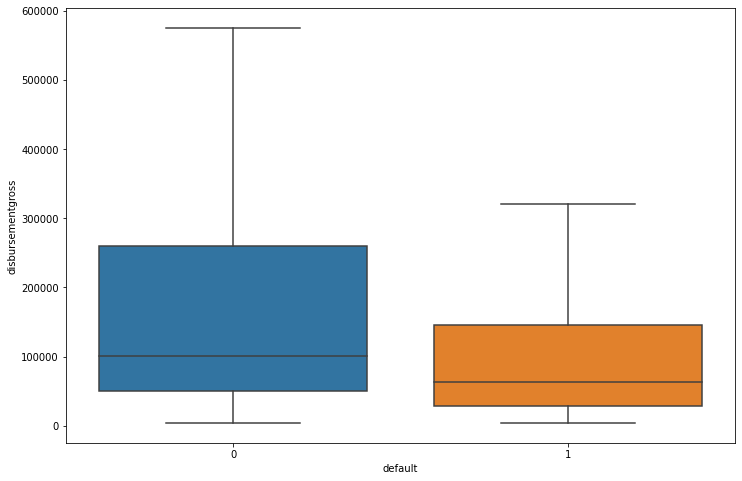

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='default', y='disbursementgross', data=df, showfliers=False)

Disbursementgross is higher for loans that did not default. We will explore in the next section how `disbursementgross` is related to term length, which we willl delve deeper into later.

# Analysis, Part 2

We suspect that columns like term, approval date, bank, industry, gross approval and franchise will have an affect on whether or not a loan will default. We will look into that here.

## newexist

Let's take a look at how many of the SBA loans are for existing businesses or new businesses. 

Text(0.5, 1.0, 'Existing vs New Businesses with SBA Loans')

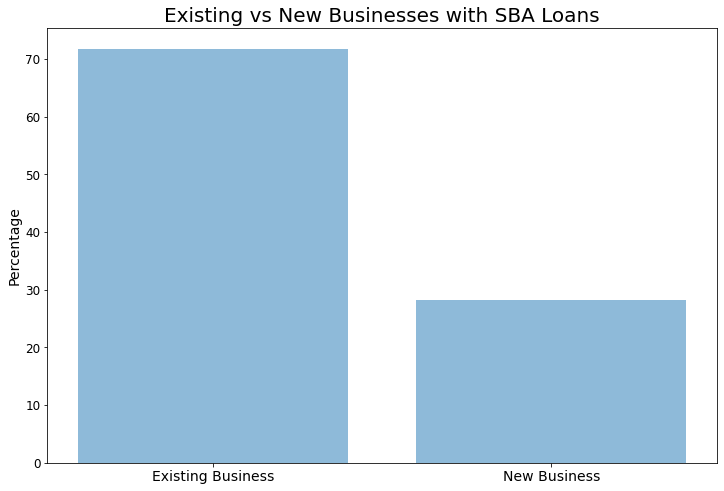

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(df['newexist'].value_counts().index, df['newexist'].value_counts()/df['newexist'].shape*100, alpha=.5)
plt.ylabel('Percentage', fontsize=14)
plt.xticks([1,2], ['Existing Business', 'New Business'],  fontsize=14)
plt.yticks(fontsize=12)
plt.title('Existing vs New Businesses with SBA Loans', fontsize=20)

## industry

First, let's look at industry.

In [ ]:
df_default = df[df['default']==1]
df_nondefault = df[df['default']==0]

In [ ]:
industry_def = df_default.groupby(['industry'])  #Groupby the industry for defaults
total_def_industry = industry_def['default'].count()    #Now add up the total per industry

In [ ]:
industry_no = df_nondefault.groupby(['industry'])   #Groupby the industry for non-defaults
total_no_industry = industry_no['default'].count()    #Now add up the total per industry

Next, find the total percentage of defaults per industry and sort them.

In [ ]:
total = (total_def_industry / (total_def_industry+total_no_industry)*100).sort_values(ascending=True) 

Now we can plot this.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

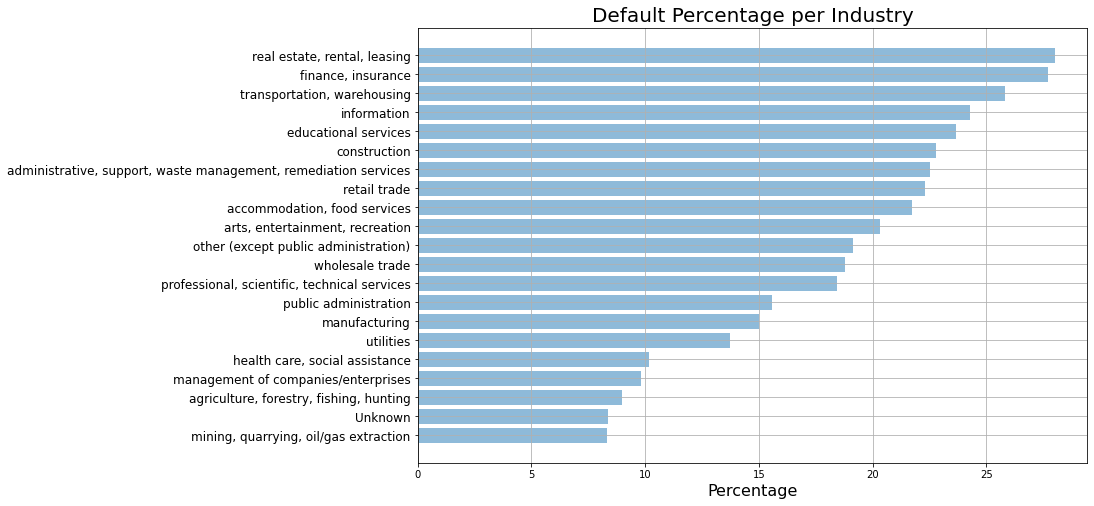

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(total.index, total, alpha=0.5, )
plt.grid()
plt.title('Default Percentage per Industry', fontsize =20)
plt.xlabel('Percentage', fontsize=16)
plt.yticks(fontsize=12)

## approvalfy

Now let's look at `approvalfy`

In [ ]:
df['approvalfy'] = df['approvalfy'].astype(int)

In [ ]:
df_default = df[df['default']==1]
df_nondefault = df[df['default']==0]

In [ ]:
df_default['approvalfy'] = df_default['approvalfy'].sort_values(ascending=True)
df_nondefault['approvalfy'] = df_nondefault['approvalfy'].sort_values(ascending=True)
year_default = df_default.groupby(['approvalfy'])
year_nondefault = df_nondefault.groupby(['approvalfy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
default = year_default['approvalfy'].count() /  (year_default['approvalfy'].count() + year_nondefault['approvalfy'].count())*100
default = default.iloc[20:] #We only want 1990-2015

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text major ticklabel objects>)

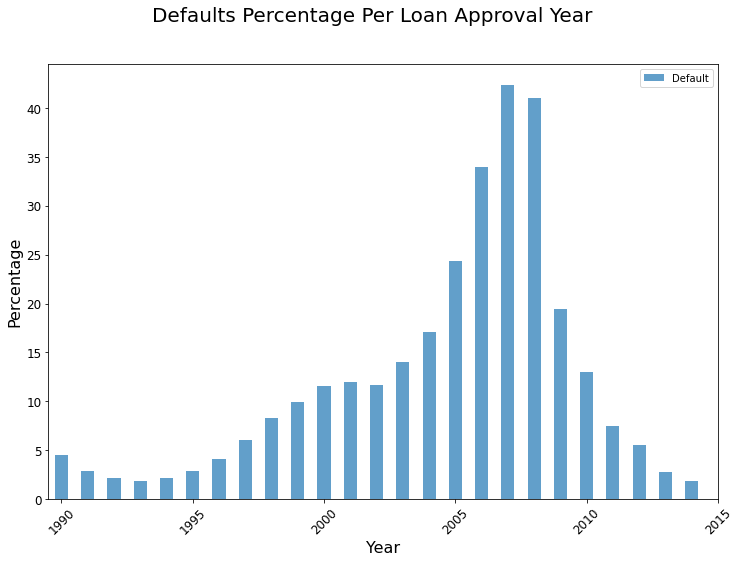

In [ ]:
fig = plt.figure(figsize=(12, 8)) 
ax = default.plot(kind='bar', legend=True, alpha=0.7, label='Default')
fig.suptitle('Defaults Percentage Per Loan Approval Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(rotation=45, ticks = [0,5,10,15,20,25], labels=[1990,1995,2000,2005,2010,2015], fontsize=12)
plt.yticks(fontsize=12)

## term

Now let's look at defaults by term.

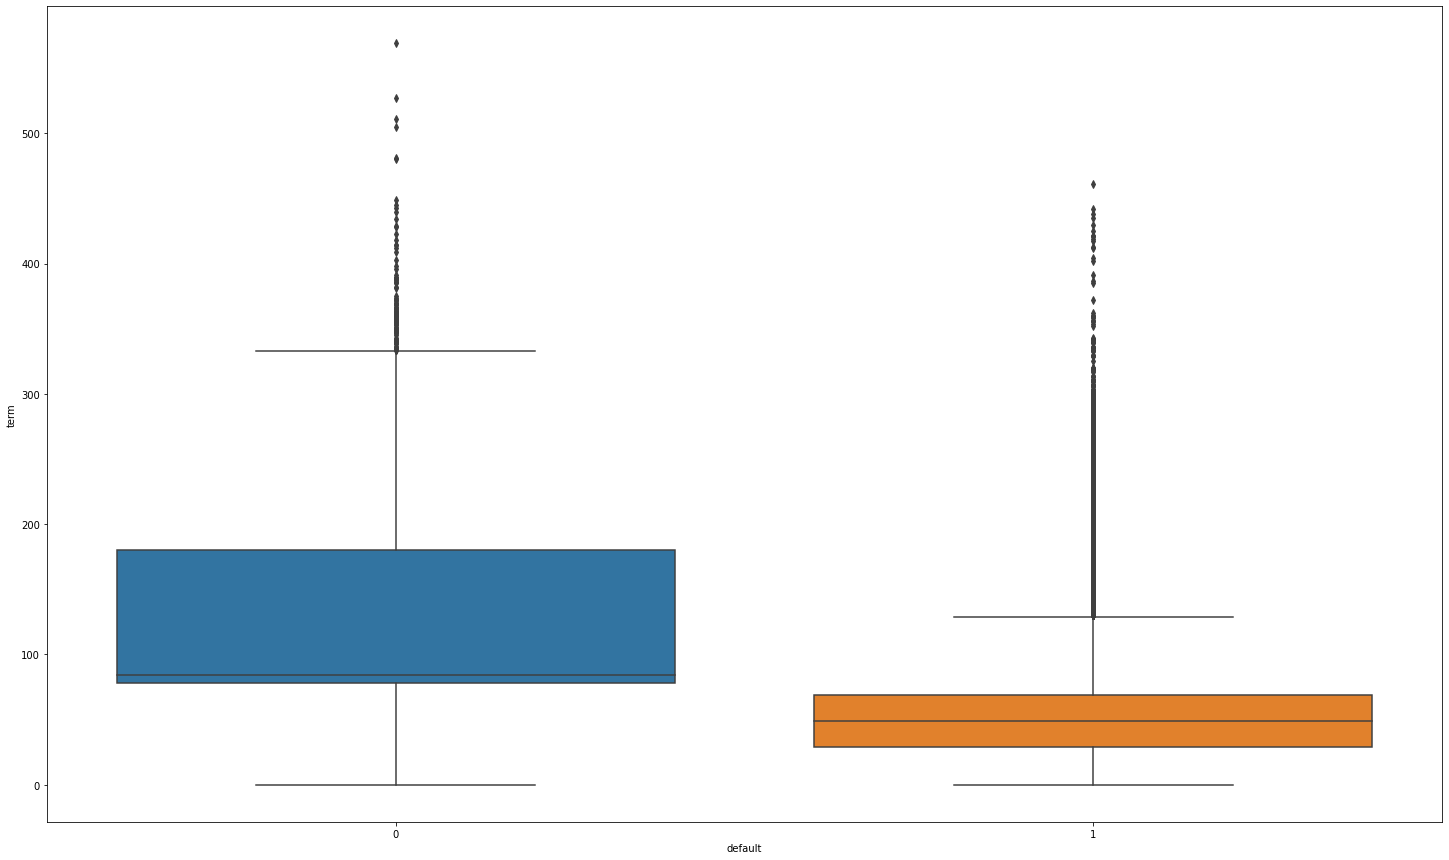

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
fig = sns.boxplot(x='default', y='term', data=df, showfliers=True)

Create a new column with the term in years instead of months

In [144]:
df['termbyyears'] = df['term'] / 12

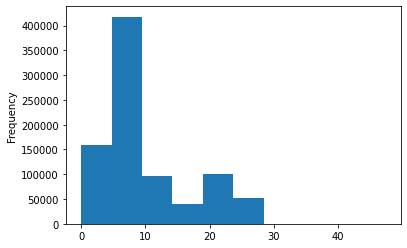

In [145]:
df['termbyyears'].plot(kind='hist')

Create a new column that rounds the term by years to nearest year in intervals of 5. We do this so our graphs will be a little easier to read.

In [148]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

df['termbyyearsrounded5'] = df['termbyyears'].apply(lambda x: custom_round(x, base=5))

In [153]:
df_bp = df[df['termbyyearsrounded5']<30]

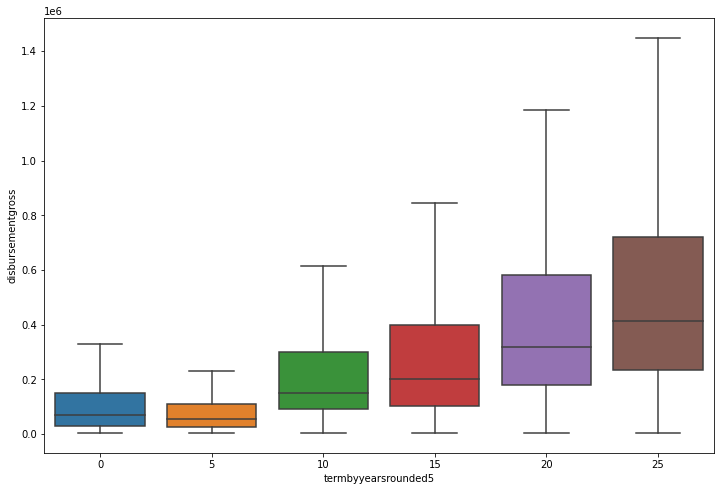

In [158]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='termbyyearsrounded5', y='disbursementgross', data=df_bp, showfliers=False)

As we can see, disbursementgross increases with term length. So the longer the term of the loan, the more total money is being lended out. Moreover, we only used the terms less than 30 years because not a lot of approved loans had terms longer than 30 years.

In [ ]:
default_by_term = df.groupby('termbyyearsrounded5')['default'].sum()

In [ ]:
default_by_term

termbyyearsrounded5
0     39194
5     88914
10    13307
15     3505
20     2997
25      890
30       30
35       15
40        1
45        0
Name: default, dtype: int64

In [ ]:
default_by_term.reset_index()

,termbyyearsrounded5,default
0,0,39194
1,5,88914
2,10,13307
3,15,3505
4,20,2997
5,25,890
6,30,30
7,35,15
8,40,1
9,45,0


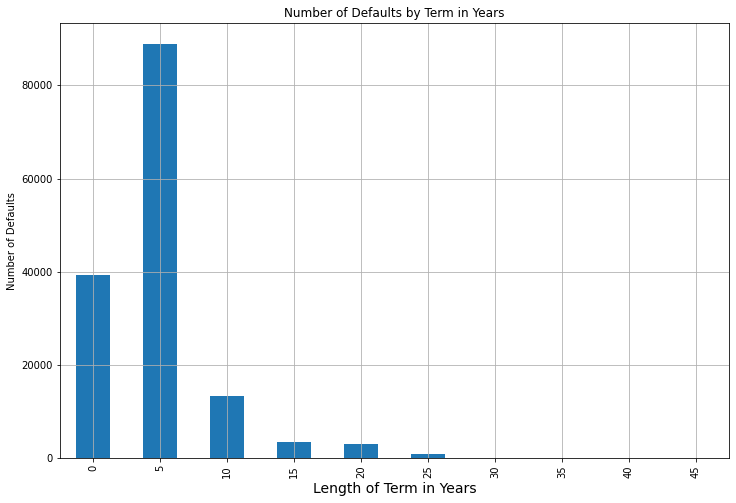

In [ ]:
ax = default_by_term.plot(kind='bar', figsize=(12, 8), title='Number of Defaults by Term in Years', grid=True)
ax.set_xlabel('Length of Term in Years', fontsize=14)
ax.set_ylabel('Number of Defaults');

In [ ]:
df_0 = df[df['termbyyearsrounded5']==0]
df_5 = df[df['termbyyearsrounded5']==5]
df_10 = df[df['termbyyearsrounded5']==10]
df_15 = df[df['termbyyearsrounded5']==15]
df_20 = df[df['termbyyearsrounded5']==20]
df_25 = df[df['termbyyearsrounded5']==25]
df_30 = df[df['termbyyearsrounded5']==30]
df_35 = df[df['termbyyearsrounded5']==35]
df_40 = df[df['termbyyearsrounded5']==40]
df_45 = df[df['termbyyearsrounded5']==45]

In [ ]:
default_by_term = default_by_term.reset_index()

In [ ]:
default_by_term['default_percentage'] = default_by_term['default']

In [ ]:
default_by_term['default_percentage'][0] = 100 * default_by_term['default'][0] / df_0.shape[0]
default_by_term['default_percentage'][1] = 100 * default_by_term['default'][1] / df_5.shape[0]
default_by_term['default_percentage'][2] = 100 * default_by_term['default'][2] / df_10.shape[0]
default_by_term['default_percentage'][3] = 100 * default_by_term['default'][3] / df_15.shape[0]
default_by_term['default_percentage'][4] = 100 * default_by_term['default'][4] / df_20.shape[0]
default_by_term['default_percentage'][5] = 100 * default_by_term['default'][5] / df_25.shape[0]
default_by_term['default_percentage'][6] = 100 * default_by_term['default'][6] / df_30.shape[0]
default_by_term['default_percentage'][7] = 100 * default_by_term['default'][7] / df_35.shape[0]
default_by_term['default_percentage'][8] = 100 * default_by_term['default'][8] / df_40.shape[0]
default_by_term['default_percentage'][9] = 100 * default_by_term['default'][9] / df_45.shape[0]

In [ ]:
default_by_term

,termbyyearsrounded5,default,default_percentage
0,0,39194,54
1,5,88914,18
2,10,13307,10
3,15,3505,8
4,20,2997,2
5,25,890,1
6,30,30,15
7,35,15,46
8,40,1,25
9,45,0,0


Now we will select only the terms that have more than 50 loans so we can get a more accurate representation.

In [ ]:
default_by_term = default_by_term[default_by_term['default'] > 50]

In [ ]:
default_by_term

,termbyyearsrounded5,default,default_percentage
0,0,39194,54
1,5,88914,18
2,10,13307,10
3,15,3505,8
4,20,2997,2
5,25,890,1


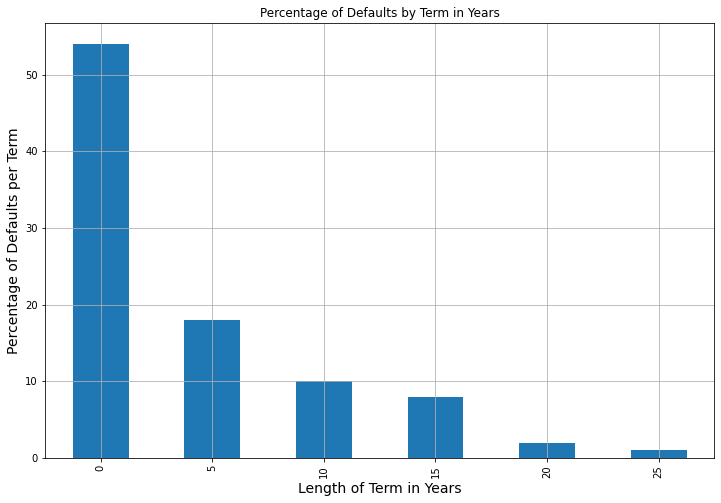

In [ ]:
ax = default_by_term.plot(kind='bar', x='termbyyearsrounded5', y='default_percentage', title='Percentage of Defaults by Term in Years', figsize=(12, 8), grid=True, legend=False)
ax.set_xlabel('Length of Term in Years', fontsize=14)
ax.set_ylabel('Percentage of Defaults per Term', fontsize=14);


An interpretation of this graph is that 54% of all loans with a term of 0 years (rounded) defaulted, 18% of all loans with a term of about 5 years (rounded) defaulted, etc.

# Trying out Models

###Logistic Regression###

In [ ]:
clf1 = LogisticRegression()

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

Let's check if our data is imbalanced.

In [ ]:
train['default'].value_counts()

0    503015
1    103823
Name: default, dtype: int64

Let's undersample our data.

In [ ]:
train_no_df = train[train['default'] == 0]
train_no_df = train_no_df.sample(103823)

train_yes_df = train[train['default'] == 1]

train = pd.concat([train_no_df, train_yes_df])

In [ ]:
train['default'].value_counts()

1    103823
0    103823
Name: default, dtype: int64

In [ ]:
train.columns

Index(['loannr_chkdgt', 'name', 'city', 'state', 'zip', 'bank', 'bankstate',
       'approvaldate', 'approvalfy', 'term', 'noemp', 'newexist', 'createjob',
       'retainedjob', 'franchisecode', 'urbanrural', 'revlinecr', 'lowdoc',
       'disbursementdate', 'disbursementgross', 'chgoffpringr', 'grappv',
       'sba_appv', 'default', 'industry', 'termbyyears', 'termbyyearsrounded5',
       'franchise'],
      dtype='object')

In [ ]:
feat_cols = ['term', 'noemp', 'createjob', 'retainedjob', 'disbursementgross', 'grappv', 'sba_appv']
target_col = 'default'

X_train = train[feat_cols]
y_train = train[target_col]

X_test = test[feat_cols]
y_test = test[target_col]

Fit the model

In [ ]:
clf1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test the model

In [ ]:
test_preds = clf1.predict(X_test)

for i in range(10):
    # We use [i] for test_pred because it's a list
    # We use .iloc[i] for y_test because it's a Pandas Series/DataFrame
    print(f'Predicted = {test_preds[i]}, Actual = {y_test.iloc[i]}')

Predicted = 1, Actual = 1
Predicted = 0, Actual = 0
Predicted = 0, Actual = 0
Predicted = 0, Actual = 1
Predicted = 0, Actual = 0
Predicted = 0, Actual = 1
Predicted = 0, Actual = 0
Predicted = 0, Actual = 0
Predicted = 1, Actual = 1
Predicted = 0, Actual = 0


Calculate the probabilities

In [ ]:
test_pred_proba = clf1.predict_proba(X_test)

for i in range(10):
    # We use [i] for test_pred because it's a list (actually a numpy array, basically the same thing)
    # We use .iloc[i] for y_test because it's a Pandas Series/DataFrame
    print(f'Predicted: P("0") = {test_pred_proba[i][0]:.3f}, P("1") = {test_pred_proba[i][1]:.3f}, Actual = {y_test.iloc[i]}')

Predicted: P("0") = 0.462, P("1") = 0.538, Actual = 1
Predicted: P("0") = 0.695, P("1") = 0.305, Actual = 0
Predicted: P("0") = 0.685, P("1") = 0.315, Actual = 0
Predicted: P("0") = 0.527, P("1") = 0.473, Actual = 1
Predicted: P("0") = 0.632, P("1") = 0.368, Actual = 0
Predicted: P("0") = 0.558, P("1") = 0.442, Actual = 1
Predicted: P("0") = 0.598, P("1") = 0.402, Actual = 0
Predicted: P("0") = 0.666, P("1") = 0.334, Actual = 0
Predicted: P("0") = 0.487, P("1") = 0.513, Actual = 1
Predicted: P("0") = 0.640, P("1") = 0.360, Actual = 0


In [ ]:
pd.Series(test_preds).value_counts()

0    239370
1     20704
dtype: int64

Calculating how many times our model was correct (when predicitions are the same as the test set)

In [ ]:
correct = 0
for i in range(y_test.shape[0]):
    if test_preds[i] == y_test.iloc[i]:
        correct += 1
        
print(f'Correct {correct} times ({100 * correct / y_test.shape[0]:.2f}%)')

Correct 211452 times (81.30%)


In [ ]:
clf1.coef_

array([[-6.81267893e-03, -2.99860481e-04,  2.83201288e-05,
         2.21378167e-04,  2.71040752e-06,  2.39332393e-06,
        -5.74221035e-06]])

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89    215044
           1       0.41      0.19      0.26     45030

    accuracy                           0.81    260074
   macro avg       0.63      0.57      0.58    260074
weighted avg       0.77      0.81      0.78    260074



For 0 (did not default):
- 85% precision: out of the businesses we predicted will not default, 85% of them actually did not
- 94% recall: out of the businesses who actually did not default, 94% of them did we predict would not default
- 89% f1-score: the harmonic mean rather than the normal mean of precision and recall for not default

For 1 (default):
- 41% precision: out of the businesses we predicted will default, 41% of them actually did
- 19% recall: out of the businesses who actually did default, 19% of them did we predict would default
- 26% f1-score: the harmonic mean rather than the normal mean of precision and recall for default

In general, the model preformed better on predicting the businesses who did not default as seen in the higher precision, recall, and f1-score.

Now let's encode our columns just to see what happens. Then we just repeat the process above.

In [ ]:
df_encoded = df.copy()

In [ ]:
for c in df_encoded.columns:
    if df_encoded[c].dtype == object:
        try:
            le = LabelEncoder()
            le.fit(df_encoded[c].unique())
            df_encoded[c] = le.transform(df_encoded[c])
        except Exception as e:
            print(c)
            print(e)

In [ ]:
le = LabelEncoder()
le.fit(df_encoded['approvaldate'].unique())
df_encoded['approvaldate'] = le.transform(df_encoded['approvaldate'])

In [ ]:
le = LabelEncoder()
le.fit(df_encoded['disbursementdate'].unique())
df_encoded['disbursementdate'] = le.transform(df_encoded['disbursementdate'])

In [ ]:
clf = LogisticRegression(max_iter=10000)

In [ ]:
train, test = train_test_split(df_encoded, test_size=0.3, random_state=0)

In [ ]:
train['default'].value_counts()

0    503015
1    103823
Name: default, dtype: int64

In [ ]:
train_no_df = train[train['default'] == 0]
train_no_df = train_no_df.sample(103823)

train_yes_df = train[train['default'] == 1]

train = pd.concat([train_no_df, train_yes_df])

In [ ]:
train['default'].value_counts()

1    103823
0    103823
Name: default, dtype: int64

In [ ]:
train.shape

(207646, 28)

In [ ]:
feat_cols = ['city', 'state', 'zip', 'bank', 'bankstate', 'approvaldate', 'approvalfy', 'term', 'noemp', 'newexist', 'createjob', 
             'retainedjob', 'franchisecode', 'urbanrural', 'revlinecr', 'lowdoc', 'disbursementdate', 'disbursementgross', 'grappv', 'sba_appv', 'industry']
target_col = 'default'

X_train = train[feat_cols]
y_train = train[target_col]

X_test = test[feat_cols]
y_test = test[target_col]

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_preds = clf.predict(X_test)

for i in range(10):
    # We use [i] for test_pred because it's a list (actually a numpy array, basically the same thing)
    # We use .iloc[i] for y_test because it's a Pandas Series/DataFrame
    print(f'Predicted = {test_preds[i]}, Actual = {y_test.iloc[i]}')

Predicted = 1, Actual = 1
Predicted = 0, Actual = 0
Predicted = 0, Actual = 0
Predicted = 1, Actual = 1
Predicted = 1, Actual = 0
Predicted = 1, Actual = 1
Predicted = 0, Actual = 0
Predicted = 0, Actual = 0
Predicted = 1, Actual = 1
Predicted = 1, Actual = 0


In [ ]:
test_pred_proba = clf.predict_proba(X_test)

for i in range(10):
    # We use [i] for test_pred because it's a list (actually a numpy array, basically the same thing)
    # We use .iloc[i] for y_test because it's a Pandas Series/DataFrame
    print(f'Predicted: P("0") = {test_pred_proba[i][0]:.3f}, P("1") = {test_pred_proba[i][1]:.3f}, Actual = {y_test.iloc[i]}')

Predicted: P("0") = 0.292, P("1") = 0.708, Actual = 1
Predicted: P("0") = 0.752, P("1") = 0.248, Actual = 0
Predicted: P("0") = 0.748, P("1") = 0.252, Actual = 0
Predicted: P("0") = 0.146, P("1") = 0.854, Actual = 1
Predicted: P("0") = 0.241, P("1") = 0.759, Actual = 0
Predicted: P("0") = 0.271, P("1") = 0.729, Actual = 1
Predicted: P("0") = 0.503, P("1") = 0.497, Actual = 0
Predicted: P("0") = 0.769, P("1") = 0.231, Actual = 0
Predicted: P("0") = 0.149, P("1") = 0.851, Actual = 1
Predicted: P("0") = 0.441, P("1") = 0.559, Actual = 0


In [ ]:
pd.Series(test_preds).value_counts()

0    161390
1     98684
dtype: int64

In [ ]:
correct = 0
for i in range(y_test.shape[0]):
    if test_preds[i] == y_test.iloc[i]:
        correct += 1
        
print(f'Correct {correct} times ({100 * correct / y_test.shape[0]:.2f}%)')

Correct 190254 times (73.15%)


In [ ]:
train['default'].value_counts(normalize=True)

1    0.5
0    0.5
Name: default, dtype: float64

In [ ]:
correct = 0
for i in range(y_test.shape[0]):
    if 1 == y_test.iloc[i]:
        correct += 1
        
print(f'Correct {correct} times ({100 * correct / y_test.shape[0]:.2f}%)')

Correct 45030 times (17.31%)


In [ ]:
clf.coef_

array([[-2.19590039e-06, -6.28273615e-04,  3.03651754e-06,
        -7.54132186e-05, -2.01880943e-04,  1.12512405e-03,
         6.74029525e-04, -2.14472122e-02, -8.50326555e-04,
         1.16269621e-05,  3.20979762e-04,  2.18654220e-05,
         3.05755694e-06,  3.77409851e-05,  6.56509999e-06,
        -2.13913029e-05, -1.15122664e-03, -2.13585325e-06,
         5.13333265e-06, -2.13528953e-06,  1.89547926e-04]])

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81    215044
           1       0.37      0.82      0.51     45030

    accuracy                           0.73    260074
   macro avg       0.66      0.77      0.66    260074
weighted avg       0.85      0.73      0.76    260074



For 0 (did not default):
- 95% precision: out of the businesses we predicted will not default, 95% of them actually did not
- 71% recall: out of the businesses who actually did not default, 71% of them did we predict would not default
- 81% f1-score: the harmonic mean rather than the normal mean of precision and recall for not default

For 1 (default):
- 37% precision: out of the businesses we predicted will default, 37% of them actually did
- 82% recall: out of the businesses who actually did default, 82% of them did we predict would default
- 51% f1-score: the harmonic mean rather than the normal mean of precision and recall for default

In general, the model preformed better on predicting the businesses who did not default as seen in the higher precision and f1-score.

###Nearest Neighboors###

In [ ]:
df_new = df
df_new = df_new.drop(['approvalfy', 'disbursementdate', 'chgoffpringr', 'name', 'city', 'zip', 'noemp', 'newexist', 'createjob', 'retainedjob','urbanrural', 'lowdoc', 'grappv', 'sba_appv'], axis='columns')  #We don't want these columns for this

In [ ]:
for c in df_new.columns:
  if c != 'default':  
    if df_new[c].dtype == object:  #If it is a string, then encode it. 
        try:  
            le = LabelEncoder()           
            le.fit(df_new[c].unique())    
            df_new[c] = le.transform(df_new[c])  
        except Exception as e:         
            print(c)         
            print(e)

In [ ]:
le = LabelEncoder()
le.fit(df_new['approvaldate'].unique())
df_new['approvaldate'] = le.transform(df_new['approvaldate'])

In [ ]:
from sklearn.model_selection import train_test_split
y = df_new.default
X = df_new.drop(['default'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
nn_clf = KNeighborsClassifier()
nn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
nn_clf.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
nn_clf.predict_proba(test_X)

array([[1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ]])

In [ ]:
y_pred_nn = nn_clf.predict(test_X)
print(classification_report(test_y, y_pred_nn))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89    179492
           1       0.33      0.15      0.20     37236

    accuracy                           0.80    216728
   macro avg       0.59      0.54      0.55    216728
weighted avg       0.75      0.80      0.77    216728



In [ ]:
# Different number of neighbors used for prediction
for n_neighbors in [1, 5, 10, 15]:
    #  Build the classifier
    nn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train it
    nn_clf.fit(train_X, train_y)
    
    # Make predictions on the test set
    y_pred_nn = nn_clf.predict(test_X)
    
    # Print the classification report
    print(f'{n_neighbors} neighbors')
    print(classification_report(test_y, y_pred_nn))
    print('='*40)

1 neighbors
              precision    recall  f1-score   support

           0       0.84      0.84      0.84    179492
           1       0.25      0.25      0.25     37236

    accuracy                           0.74    216728
   macro avg       0.55      0.55      0.55    216728
weighted avg       0.74      0.74      0.74    216728

5 neighbors
              precision    recall  f1-score   support

           0       0.84      0.94      0.89    179492
           1       0.33      0.15      0.20     37236

    accuracy                           0.80    216728
   macro avg       0.59      0.54      0.55    216728
weighted avg       0.75      0.80      0.77    216728

10 neighbors
              precision    recall  f1-score   support

           0       0.83      0.98      0.90    179492
           1       0.39      0.06      0.11     37236

    accuracy                           0.82    216728
   macro avg       0.61      0.52      0.51    216728
weighted avg       0.76      0.82    

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(train_X, train_y)

preds = knn.predict(test_X)

acc = knn.score(test_X, test_y)
print(f'Test set accuracy: {100*acc:.2f}%')

Test set accuracy: 82.11%


### XGBoost ###

Let's try bulding a model using XGBoost!

In [ ]:
df_encoded = df
df_encoded = df_encoded.drop(['approvalfy', 'disbursementdate', 'chgoffpringr', 'termbyyears', 'franchise', 'termbyyearsrounded5'], axis='columns')  #We don't want these columns for this

In [ ]:
df_encoded['approvaldate'] = df_encoded['approvaldate'].astype('str') #We want this column but we need it to be a string

Import LabelEncoder so that we can make all of our strings into numeric values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for c in df_encoded.columns:
  if c != 'default':  
    if df_encoded[c].dtype == object:  #If it is a string, then encode it. 
        try:  
            le = LabelEncoder()           
            le.fit(df_encoded[c].unique())    
            df_encoded[c] = le.transform(df_encoded[c])  
        except Exception as e:         
            print(c)         
            print(e)

As you can see, the amount of defaults is a small percentage of our total dataset.

In [ ]:
df_encoded['default'].value_counts()

0    718059
1    148853
Name: default, dtype: int64

To fix this, let's do oversampling where we duplicate the defaulted data.

In [ ]:
def oversample(df, column, value):
  train_1_df = df[df[column] == 1]
  train_1_df = train_1_df.sample(value, replace=True)  #This duplicates the rows that are defaults


  train_0_df = df[df[column] == 0]

  df = pd.concat([train_0_df, train_1_df])

  return df

In [ ]:
df_encoded = oversample(df_encoded, 'default', 718062)

Below you can see we now have around 1.4 million data points to train and test with.

In [ ]:
df_encoded.shape

(1436121, 22)

Now let's split the data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
y = df_encoded.default  #We just want the default here
X = df_encoded.drop(['default'], axis=1)  #Every column except the defaults
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

Now we can do XGBoost.

In [ ]:
import xgboost as xgb
model2 = xgb.XGBClassifier()
model2.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score
pred2 = model2.predict(test_X)
print("Accuracy for model: %.2f" % (accuracy_score(test_y, pred2) * 100))

Accuracy for model: 90.37


The model accuracy is 90% which is really good but let's check some other metrics to make sure.

In [ ]:
from sklearn.metrics import classification_report
pred = model2.predict(test_X)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90    179496
           1       0.90      0.91      0.90    179535

    accuracy                           0.90    359031
   macro avg       0.90      0.90      0.90    359031
weighted avg       0.90      0.90      0.90    359031



As we can see, this model performs very well. The precision and recall are very close together meaning that the model is predicting the ones that default just as good as the ones that do not default. Super great results.

Lastly, we can look at the features below. Term seems to be really important to predicting whether a loan will default. Other columns that are important are the approval date, bank, franchise code, state, and identifier.

In [ ]:
featuredf = pd.DataFrame(model2.feature_importances_, train_X.columns)

In [ ]:
featuredf = featuredf.sort_values(by=0, ascending=False)
featuredf[0] = featuredf[0]*100
featuredf = featuredf[:10]

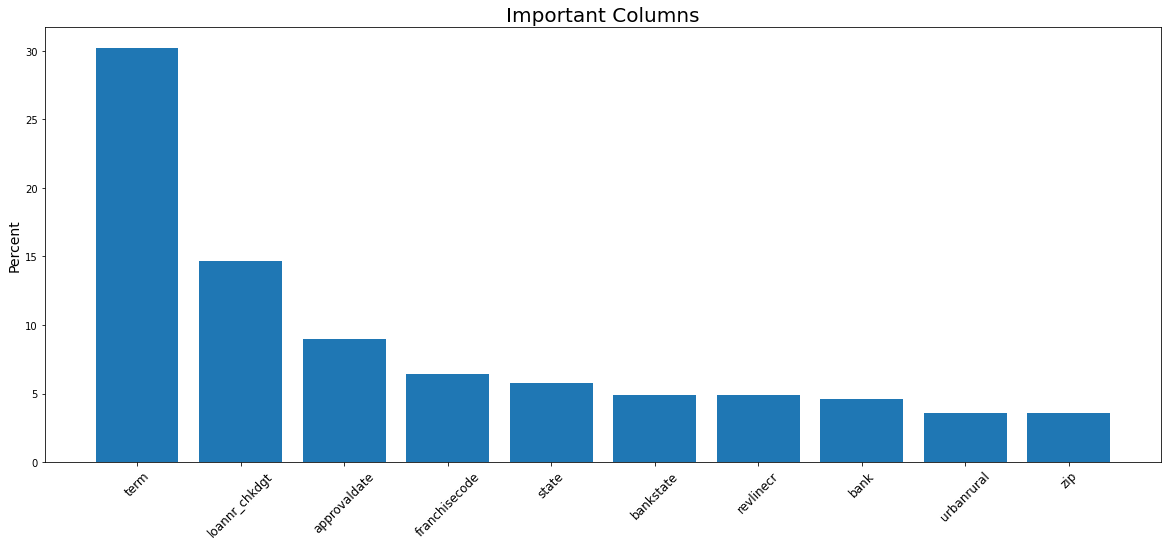

In [ ]:
plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.title('Important Columns', fontsize =20)
plt.bar(x, y)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('Percent', fontsize=14);

# Popular Banks



In [ ]:
df['bank'].value_counts()[:10]

BANK OF AMERICA NATL ASSOC        79376
WELLS FARGO BANK NATL ASSOC       61572
JPMORGAN CHASE BANK NATL ASSOC    47083
U.S. BANK NATIONAL ASSOCIATION    34178
CITIZENS BANK NATL ASSOC          32250
PNC BANK, NATIONAL ASSOCIATION    25712
BBCN BANK                         22764
CAPITAL ONE NATL ASSOC            22144
MANUFACTURERS & TRADERS TR CO     10904
READYCAP LENDING, LLC             10579
Name: bank, dtype: int64

Were going to look at Bank of America, Chase, Capital One, and Wells Fargo as these are very popular and larger banks.

First lets make a dataframe only consisting of the four banks we are going to analyze.

In [ ]:
popularbanks_df = df[(df['bank']== 'WELLS FARGO BANK NATL ASSOC') | (df['bank']== 'CAPITAL ONE NATL ASSOC') | (df['bank']== 'JPMORGAN CHASE BANK NATL ASSOC') | (df['bank']== 'BANK OF AMERICA NATL ASSOC')]

In [ ]:
popularbanks_df.head()

,loannr_chkdgt,name,city,state,zip,bank,bankstate,approvaldate,approvalfy,term,noemp,newexist,createjob,retainedjob,franchisecode,urbanrural,revlinecr,lowdoc,disbursementdate,disbursementgross,chgoffpringr,grappv,sba_appv,default,industry,termbyyears,termbyyearsrounded5,franchise
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,1980-06-02,1980,45,45,2.0,0,0,0,0,N,N,1980-07-22,600000.0,208959.0,600000.0,499998.0,1,Unknown,3.75,5,0
11,1000144007,PROFESSIONAL ELEVATOR SERVICES,CHICAGO,IL,60605,BANK OF AMERICA NATL ASSOC,OR,1997-02-28,1997,60,24,1.0,0,0,1,0,N,N,1997-11-30,150000.0,0.0,300000.0,225000.0,0,construction,5.00,5,0
15,1000244002,"ENVIRONMENTAL ROOFING SYSTEMS,",OKLAHOMA CITY,OK,73112,BANK OF AMERICA NATL ASSOC,NC,1997-02-28,1997,12,5,2.0,0,0,1,0,N,N,1997-09-30,350000.0,0.0,350000.0,262500.0,0,wholesale trade,1.00,0,0
16,1000254005,ARK MAMAGEMENT ENTERPRISES INC,MIDLAND,TX,79701,WELLS FARGO BANK NATL ASSOC,TX,1997-02-28,1997,60,5,1.0,0,0,1,0,N,Y,1997-06-30,70000.0,0.0,70000.0,56000.0,0,Unknown,5.00,5,0
17,1000264008,"FAIRFAX COURT SUBWAY, INC.",CENTREVILLE,VA,20120,BANK OF AMERICA NATL ASSOC,MD,1997-02-28,1997,60,16,1.0,0,0,1,0,N,Y,1997-07-31,100000.0,0.0,100000.0,80000.0,0,Unknown,5.00,5,0


In [ ]:
popularbanks_df['bank'].value_counts()

BANK OF AMERICA NATL ASSOC        79376
WELLS FARGO BANK NATL ASSOC       61572
JPMORGAN CHASE BANK NATL ASSOC    47083
CAPITAL ONE NATL ASSOC            22144
Name: bank, dtype: int64

Now we are going to take a look at the defaults of each bank 

In [ ]:
popdefault= popularbanks_df[popularbanks_df['default']==1]

We will find the percentage of defaults each bank has

In [ ]:
(popdefault['bank'].value_counts() / popularbanks_df['bank'].value_counts()).sort_values(ascending=True) 

WELLS FARGO BANK NATL ASSOC       0.144173
BANK OF AMERICA NATL ASSOC        0.239254
JPMORGAN CHASE BANK NATL ASSOC    0.277000
CAPITAL ONE NATL ASSOC            0.414379
Name: bank, dtype: float64

In [ ]:
popbankdefault = (popdefault['bank'].value_counts() / popularbanks_df['bank'].value_counts()*100).sort_values(ascending=True) 

Now we will plot this on a bar graph

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

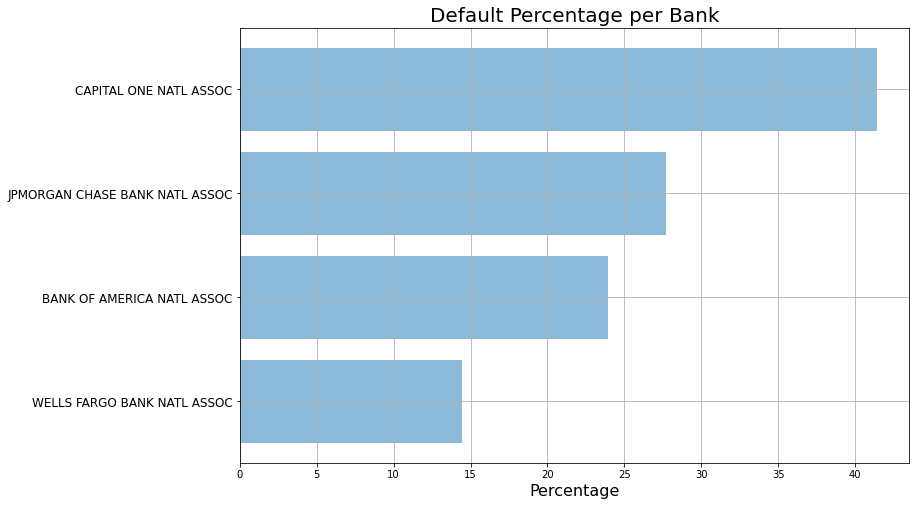

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(popbankdefault.index, popbankdefault, alpha=0.5, )
plt.grid()
plt.title('Default Percentage per Bank', fontsize =20)
plt.xlabel('Percentage', fontsize=16)
plt.yticks(fontsize=12)

Lets make functions for each bank to be able to easily analyze each one. 

In [ ]:
f_capitalone = popularbanks_df[popularbanks_df['bank']=='CAPITAL ONE NATL ASSOC']
f_chase = popularbanks_df[popularbanks_df['bank']=='JPMORGAN CHASE BANK NATL ASSOC']
f_bankofamerica = popularbanks_df[popularbanks_df['bank']=='BANK OF AMERICA NATL ASSOC']
f_wellsfargo = popularbanks_df[popularbanks_df['bank']=='WELLS FARGO BANK NATL ASSOC']

Analyzing the average term of each bank


In [ ]:
f_capitalone['term'].mean() # finding the average term length

66.8835350433526

In [ ]:
f_chase['term'].mean()  # finding the average term length

76.23704946583693

In [ ]:
f_bankofamerica['term'].mean() # finding the average term

72.33026355573473

In [ ]:
f_wellsfargo['term'].mean() # finding the average term

119.87798025076333

Its interesting to see that the bank with the higher percentage of defaults (Capital One, 41%) has the lowest average term (66 months) and the bank with the lowest percentage of defaults (Wells Fargo, 14%) has the highest average term (119 months).